Vitals Data Graphed per SBS Score

In [5]:
import os
from scipy.io import loadmat
from matplotlib import pyplot as plt
import datetime
import numpy as np
import Plot
import Filtering

Plotting Functions

In [14]:
def signal_vs_time(signal, sbs_val, patient, name, slice_size_min, lead_time, count):
    signal_length = len(signal)
    time = np.arange(1, signal_length + 1)
    window_size = 100
    freq = 0.5
    
    if name == "hr":
        # t = 900
        plt.plot(time, signal, color='blue')
        plt.xticks(np.linspace(0, signal_length, num=10), np.arange(0, 901, step=100))
        # SBS marker
        # plt.axvline(t*1.5, color='red', linestyle='--')
        # plt.text(t*1.5, 0.095, "SBS Score Recorded")
        plt.ylim(80, 200)
        plt.xlabel('Time')
        plt.ylabel('Heart Rate (bpm)')   
        plt.title(f'{patient}_heart_rate_sbs{sbs_val}waveform_{lead_time}min_{slice_size_min - lead_time}min_index{count}')

        plt.show()

Plot Full Waveform for Heart Rate (Preliminary Check)

In [ ]:
data_dir = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData'

for patient in os.listdir(data_dir):
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        print('Processing:', patient)
        print('Loading data')
            
        filename = f'{patient}_SickBayData.mat'
            
        data_path = os.path.join(patient_dir, filename)
        data = loadmat(data_path)
        
        time = data["time"]
        hr = data["heart_rate"]
        
        # Plotting All Vitals Data vs. Time
        # Convert timestamp strings to datetime objects
        time_data = [datetime.datetime.strptime(timestamp[0], "%m/%d/%Y %I:%M:%S %p") for row in time for timestamp in row]
        
        # Convert datetime objects to seconds
        time_seconds = [(timestamp - time_data[0]).total_seconds() for timestamp in time_data]
        
        hr = hr.ravel()
        
        signal_label = "heart rate"
        title = f"Heart Rate vs Time: {patient}"

        plt.figure(figsize=(12, 6))
        plt.plot(time_seconds, hr, color='blue', label=signal_label)
        plt.title(title)
        plt.xlabel("Time")
        plt.ylabel(signal_label)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.ylim(0, 220)
        plt.show()

Plot Vitals vs. SBS Data

In [10]:
# Load Parameters
data_dir = r'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData'
# data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
lead_time = 10
slice_size_min = 15
sr = .5

Processing: Patient11
Loading data
original hr vitals array shape: (14, 450) 
final hr vitals array shape: (14, 450)
original rr vitals array shape: (14, 450) 
rr SBS index 0 has insufficient data, zeros appended in place
rr SBS index 1 has insufficient data, zeros appended in place
rr SBS index 2 has insufficient data, zeros appended in place
rr SBS index 3 has insufficient data, zeros appended in place
rr SBS index 4 has insufficient data, zeros appended in place
rr SBS index 5 has insufficient data, zeros appended in place
rr SBS index 6 has insufficient data, zeros appended in place
rr SBS index 7 has insufficient data, zeros appended in place
rr SBS index 8 has insufficient data, zeros appended in place
rr SBS index 9 has insufficient data, zeros appended in place
rr SBS index 10 has insufficient data, zeros appended in place
rr SBS index 11 has insufficient data, zeros appended in place
rr SBS index 12 has insufficient data, zeros appended in place
rr SBS index 13 has insufficien

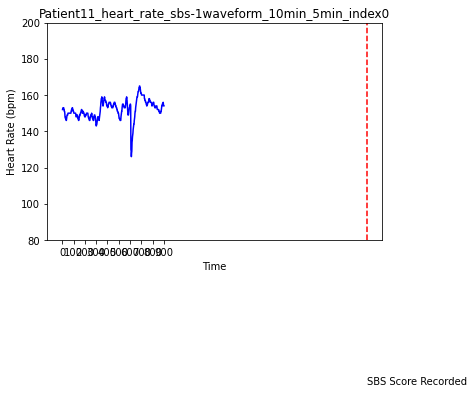

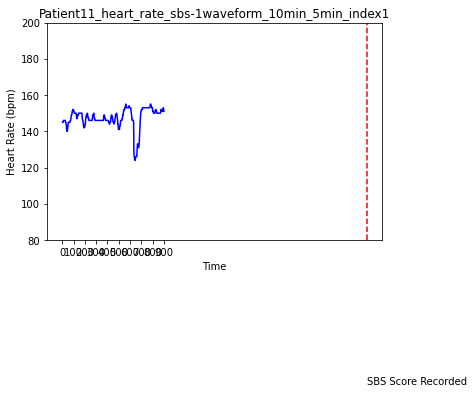

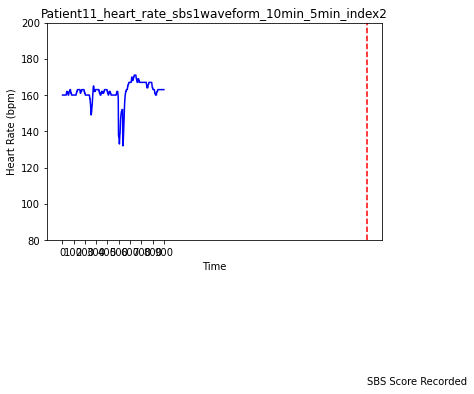

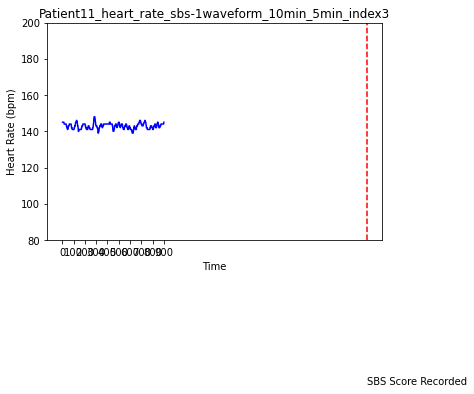

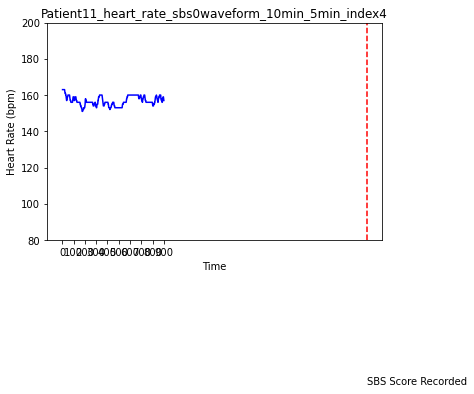

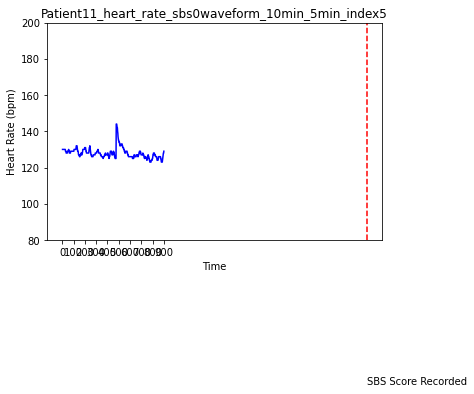

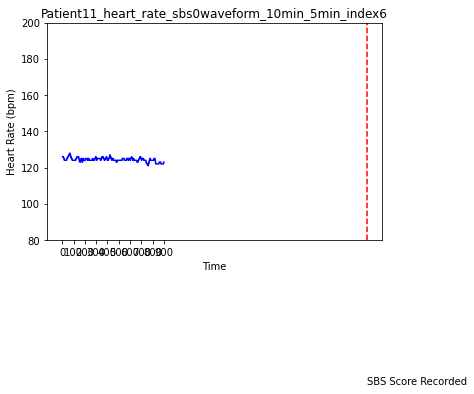

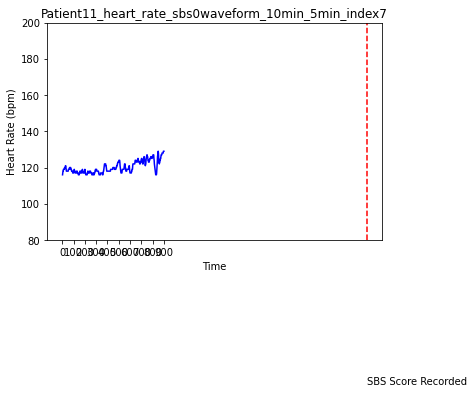

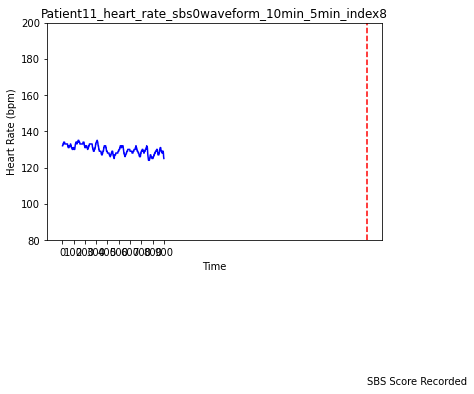

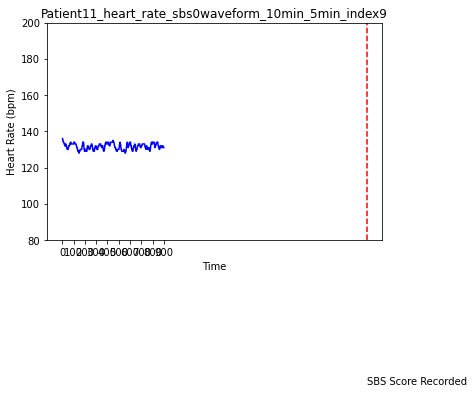

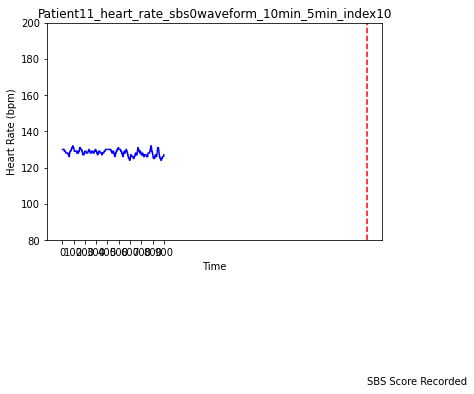

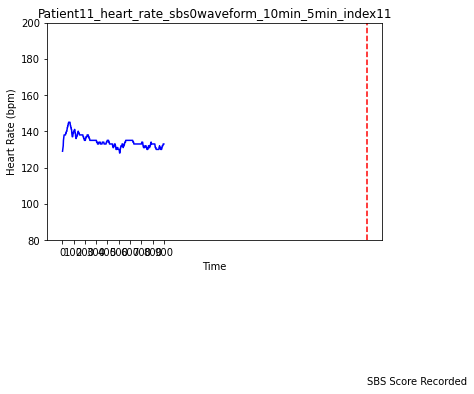

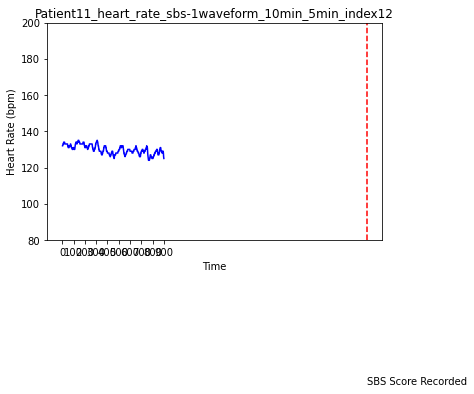

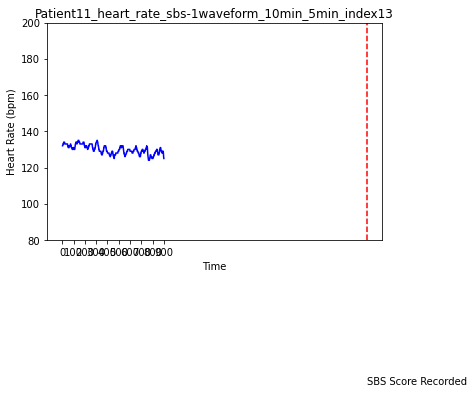

Processing: Patient12
Loading data
original hr vitals array shape: (6, 450) 
final hr vitals array shape: (6, 450)
original rr vitals array shape: (6, 450) 
final rr vitals array shape: (6, 450)
original spo2 vitals array shape: (6, 450) 
final spo2 vitals array shape: (6, 450)
original bpm vitals array shape: (6, 450) 
final bpm vitals array shape: (6, 450)
original bps vitals array shape: (6, 450) 
final bps vitals array shape: (6, 450)
original bpd vitals array shape: (6, 450) 
final bpd vitals array shape: (6, 450)


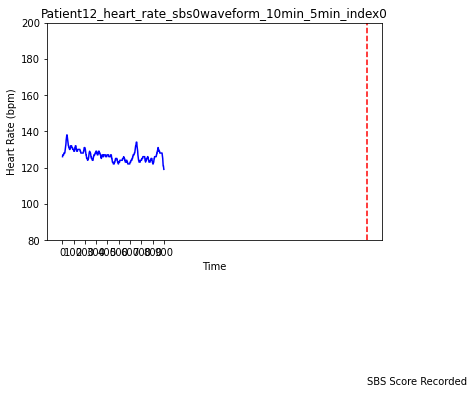

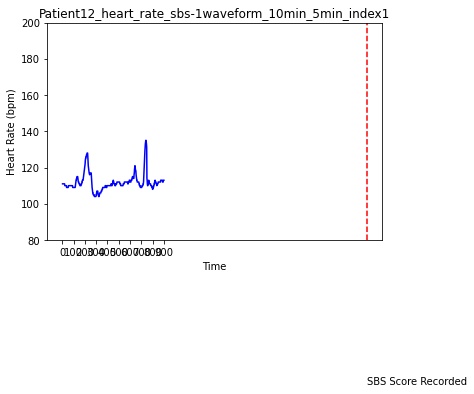

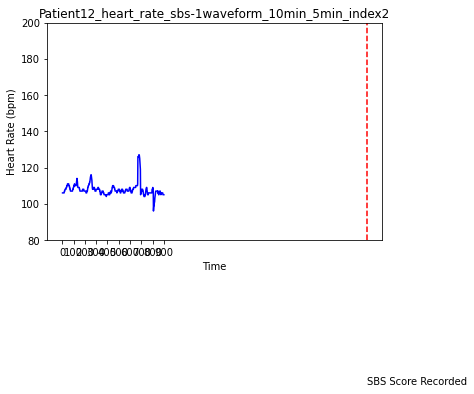

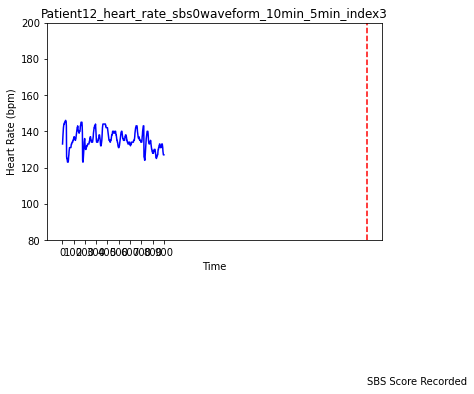

KeyboardInterrupt: 

In [15]:
# Iterate through every patient
for patient in os.listdir(data_dir):
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        print('Processing:', patient)
        print('Loading data')
        
        data_filepath_vitals = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN.mat')
        
        vitals_data = loadmat(data_filepath_vitals)
        temp_hr = vitals_data['heart_rate']
        temp_SpO2 = vitals_data['SpO2']
        temp_rr = vitals_data['respiratory_rate']
        temp_bps = vitals_data['blood_pressure_systolic']
        temp_bpm = vitals_data['blood_pressure_mean']
        temp_bpd = vitals_data['blood_pressure_diastolic']
        vitals_SBS = vitals_data['sbs'].flatten()
        hr = []
        rr = []
        SpO2 = []
        bpm = []
        bps = []
        bpd = []
        vitals_list = [hr,rr,SpO2,bpm,bps,bpd]
        vitals_names = ['hr','rr','spo2','bpm','bps','bpd']
        temp_vitals = [temp_hr,temp_rr, temp_SpO2,temp_bpm,temp_bps,temp_bpd]
        
        flag_list = [0] * (int)(sr * 60 * slice_size_min) #generate a list to insert in place of invalid data, 
        #this list serves as a flag for a window to ignore in the box plot function

        for j in range(len(vitals_list)): #go through every vitals metric
            print(f'original {vitals_names[j]} vitals array shape: {np.array(temp_vitals[j]).shape} ')
            for i in range(len(vitals_SBS)): #go through every SBS score for each vitals metric
                if (Filtering.checkVitals(temp_vitals[j][i], slice_size_min, vitals_names[j])): #check the data in a single window
                    vitals_list[j].append(temp_vitals[j][i]) #append that single window data to the 2D hr,rr,spo2,bpm,bps,bpd arrays if that window's data is valid
                else:
                    vitals_list[j].append(flag_list) #append an array of zeros for window number i for the jth vitals metric if the data is invalid(i.e. too many NaN points)
                    print(f'{vitals_names[j]} SBS index {i} has insufficient data, zeros appended in place') 
            print(f'final {vitals_names[j]} vitals array shape: {np.array(vitals_list[j]).shape}') #should be the number of SBS scores by the number of samples in a window

        # Output Graphs for Every SBS Score and Vitals Waveform
        for i, name in zip(range(len(vitals_list)), vitals_names):
            vitals_waveform = vitals_list[i]
            count = 0
            for j in range(len(vitals_SBS)):
                sbs_score = vitals_SBS[j]
                cur_waveform = vitals_waveform[j]
                signal_vs_time(cur_waveform, sbs_score, patient, name, slice_size_min, lead_time, count)
                plt.show()
                count += 1